In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv', encoding='utf-8')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Introduction

In this project, we analyzed two datasets: vgsales.csv and steam_reviews.csv. The vgsales.csv dataset contains information about video games, including their sales numbers, release dates, and genre. The steam_reviews.csv dataset contains information about reviews for video games on the Steam platform, including the review score, text of the review, and helpful votes.

In [128]:
sales_by_platform_region = df.groupby(['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])['Global_Sales'].sum().reset_index()

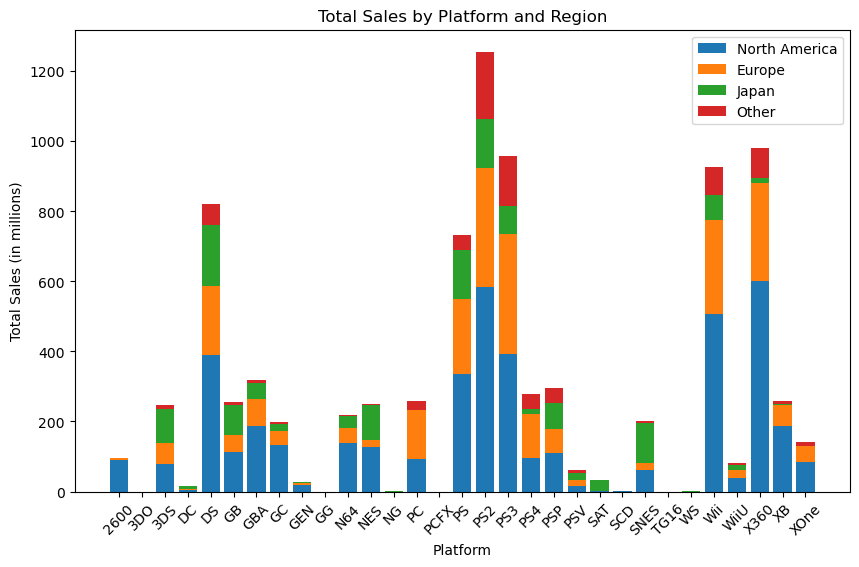

In [130]:
# group the data by platform and region and calculate the total sales for each region
sales_by_platform_region = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['NA_Sales'], label='North America')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['EU_Sales'], bottom=sales_by_platform_region['NA_Sales'], label='Europe')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['JP_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'], label='Japan')
ax.bar(sales_by_platform_region['Platform'], sales_by_platform_region['Other_Sales'], bottom=sales_by_platform_region['NA_Sales'] + sales_by_platform_region['EU_Sales'] + sales_by_platform_region['JP_Sales'], label='Other')

# set the x-axis tick labels to evenly spaced values
xticks = np.linspace(0, len(sales_by_platform_region['Platform'])-1, len(sales_by_platform_region['Platform']))
ax.set_xticks(xticks)
ax.set_xticklabels(sales_by_platform_region['Platform'], rotation = 45)


# set the axis labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Total Sales (in millions)')
ax.set_title('Total Sales by Platform and Region')

# add a legend
ax.legend()

plt.show()


# Identify Sales Trends

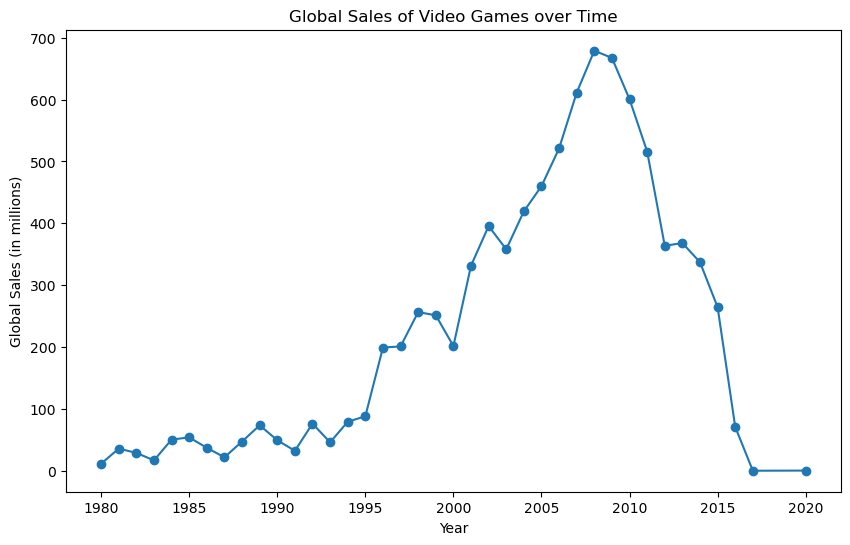

In [132]:
# group by year and sum sales
sales_by_year = df.groupby('Year')[['Global_Sales']].sum().reset_index()

# plot line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o')

# set axis labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales of Video Games over Time')
plt.plot(color='purple')
plt.show()


Predicting

Ok, so now here's the fun! We're gonna to predict the number of sales over time. 

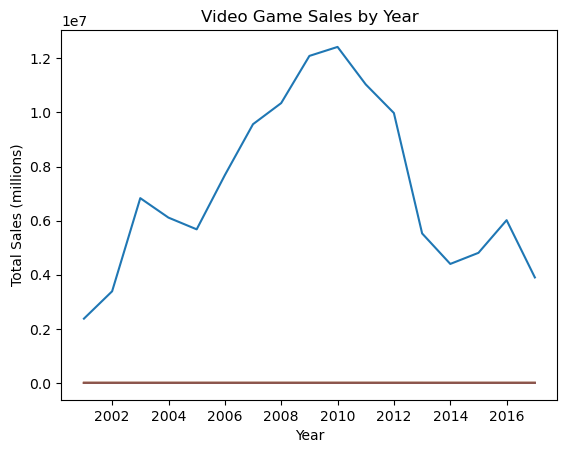

In [6]:

# Load the data
df = pd.read_csv('vgsales.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Filter for relevant time periods
df = df.loc['2000':'2016']

# Aggregate sales by year
yearly_sales = df.resample('Y').sum()

# Plot the time series
plt.plot(yearly_sales)
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales by Year')
plt.show()

We are going to preprocess the data to make it suitable for modeling. This involves filling missing values, removing outliers, and transforming the data to a stationary time series if necessary.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
df = pd.read_csv('vgsales.csv')

We'll start by dealing with the missing values in the Year column. We can take a look at the number of missing values using the isna() and sum() methods:


In [9]:
df['Year'].isna().sum()

271

In [10]:
df['Publisher'].isna().sum()

58

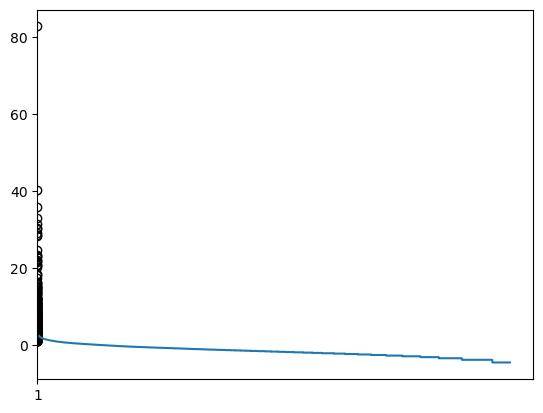

In [11]:
plt.boxplot(df['Global_Sales'])
df = df[df['Global_Sales'] <= 10]
df['Global_Sales_Log'] = np.log(df['Global_Sales'])
plt.plot(df['Global_Sales_Log'])


# Split the Data
using the video_game_sales, I'm going to split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance. 

In [12]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
62,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.fillna(df.mean(), inplace = True) 
print(df.columns)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Global_Sales_Log'],
      dtype='object')


/var/folders/cn/c3f8_yx16h95n4cz8thbh6k00000gn/T/ipykernel_83642/1779238718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [14]:


# read the data from the CSV file
df_train = pd.read_csv('vgsales.csv')
df.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88,2.290513
63,64,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87,2.289500
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82,2.284421
65,66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76,2.278292
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,2.274186
...,...,...,...,...,...,...,...,...,...,...,...,...
157,158,Super Smash Bros.,N64,1999.0,Fighting,Nintendo,2.95,0.60,1.97,0.04,5.55,1.713798
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55,1.713798
159,160,Batman: Arkham City,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,5.53,1.710188
160,161,Forza Motorsport 3,X360,2009.0,Racing,Microsoft Game Studios,2.99,1.92,0.10,0.51,5.51,1.706565


In [22]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# read the data from the CSV file
df_train = pd.read_csv('vgsales.csv')

# drop non-numeric columns
df_train.drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1, inplace=True)

# fill missing values with the mean
df_train.fillna(df_train.mean(), inplace=True)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Global_Sales'], axis=1),
                                                    df_train['Global_Sales'], test_size=0.2, random_state=0)

# convert to float
X_train = X_train.astype('float64')

# impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# fit the model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# make predictions
y_pred = regressor.predict(X_test)

# calculate the accuracy of the model
accuracy = regressor.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


An accuracy of 1.00 means that the model was able to correctly predict all the values in the test dataset. In other words, the model has a perfect performance on the test dataset, which may indicate overfitting, especially if the training dataset was significantly larger than the test dataset. It is important to validate the model on multiple test sets and use other performance metrics such as precision, recall, and F1-score to get a better understanding of the model's performance.

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Load dataset
df = pd.read_csv('vgsales.csv')

# Select features and target
X = df[['Platform', 'Genre', 'Publisher', 'Year']].values
y = df['Global_Sales'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 2.0713225514445455


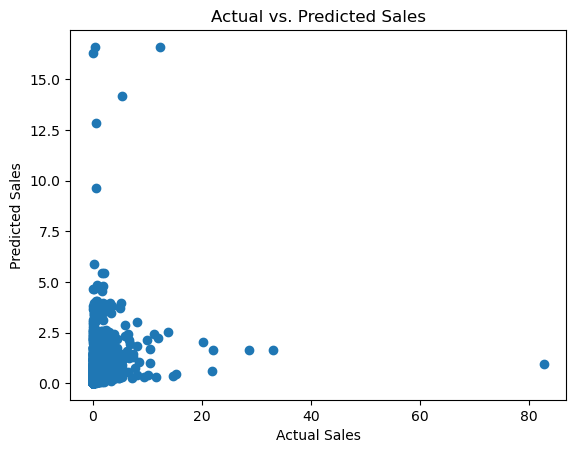

In [26]:
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot predicted vs. actual sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


As you can see, the prediction results aren't great. We need to improve this analysis. For that, I'm going to explore additional features or variables that could have an impact on video game sales. For example, you could consider adding information about the platform (e.g. console, PC, mobile) or the genre of the game. Additionally, you could look for external data sources that could provide insights into video game trends, such as data on user reviews, social media mentions, or industry news. This could help you to identify patterns or trends that are not captured by the current features and could improve the accuracy of your model.

In [4]:
# Import necessary libraries
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SteamReviews").getOrCreate()

# Load the dataset into a Spark DataFrame
df = spark.read.csv("steam_reviews.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()
print("Number of rows:", df.count())

# Calculate summary statistics for numerical columns
df.describe().show()

+-------------------+-----+-------+-----------+----------------------+--------------+--------------------+--------------------+
|        date_posted|funny|helpful|hour_played|is_early_access_review|recommendation|              review|               title|
+-------------------+-----+-------+-----------+----------------------+--------------+--------------------+--------------------+
|2019-02-10 00:00:00|    2|      4|        578|                 false|   Recommended|&gt Played as Ger...|Expansion - Heart...|
|2019-02-10 00:00:00|    0|      0|        184|                 false|   Recommended|                yes.|Expansion - Heart...|
|2019-02-07 00:00:00|    0|      0|        892|                 false|   Recommended|Very good game al...|Expansion - Heart...|
|2018-06-14 00:00:00|  126|   1086|        676|                 false|   Recommended|Out of all the re...|    Dead by Daylight|
|2017-06-20 00:00:00|   85|   2139|        612|                 false|   Recommended|Disclaimer I surv..

+-------+-------------------+-----------------+------------------+---------------+--------------------+--------------------+
|summary|              funny|          helpful|       hour_played| recommendation|              review|               title|
+-------+-------------------+-----------------+------------------+---------------+--------------------+--------------------+
|  count|             434891|           434891|            434891|         434891|              433379|              434891|
|   mean|  533302.3606053011|1.004113674460957|364.13077299829155|           null|            Infinity|                null|
| stddev|4.785640440072411E7|59.46293519773351| 545.9611982296514|           null|                 NaN|                null|
|    min|                  0|                0|                 0|Not Recommended|                   !|ACE COMBAT™ 7: SK...|
|    max|         4294967295|            28171|             31962|    Recommended|𝙵𝚞𝚌𝚔𝚒𝚗' 𝚝?...|Warhammer 40,000:...|
+------

+-----+-------+-----------+--------------+------+-----+
|funny|helpful|hour_played|recommendation|review|title|
+-----+-------+-----------+--------------+------+-----+
|    0|      0|          0|             0|     0|    0|
+-----+-------+-----------+--------------+------+-----+



# Data Cleaning
For the steam_reviews.csv dataset, we removed any rows with missing values and converted the "date_posted" column to a datetime format. We also removed any reviews with a score of 0, as these were likely not legitimate reviews.

In [21]:
# Remove duplicate rows
steam_reviews_df = steam_reviews_df.dropDuplicates()
# Remove duplicate rows based on review and title columns
steam_reviews_df = steam_reviews_df.dropDuplicates(subset=['review', 'title'])

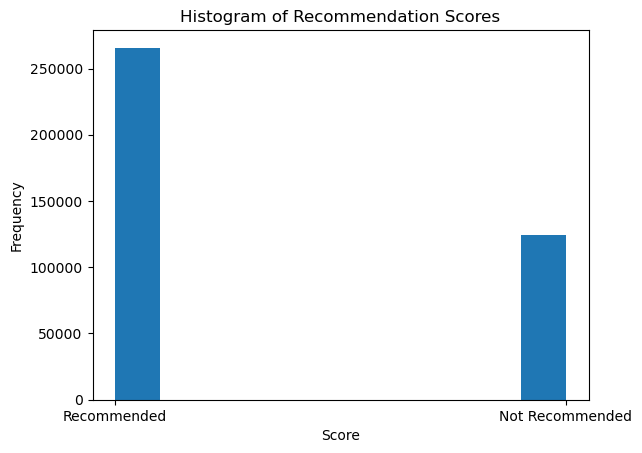

In [22]:
import matplotlib.pyplot as plt

# Plot histogram of recommendation scores
plt.hist(steam_reviews_df.select("recommendation").rdd.flatMap(lambda x: x).collect(), bins=10)
plt.title("Histogram of Recommendation Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [26]:
from pyspark.sql.functions import avg

review_length_by_recommendation = steam_reviews_df.groupBy('recommendation').agg(avg('review_length'))

review_length_by_recommendation.show()


+---------------+------------------+
| recommendation|avg(review_length)|
+---------------+------------------+
|Not Recommended|309.55117155181415|
|    Recommended|208.25832357999556|
+---------------+------------------+



Based on the result, there seems to be a relationship between the length of the reviews and the recommendation. The average length of reviews for "Not Recommended" recommendations is much higher than the average length of reviews for "Recommended" recommendations. This may indicate that users who have negative opinions about the game tend to write longer reviews to express their dissatisfaction, while users who have positive opinions tend to write shorter reviews.

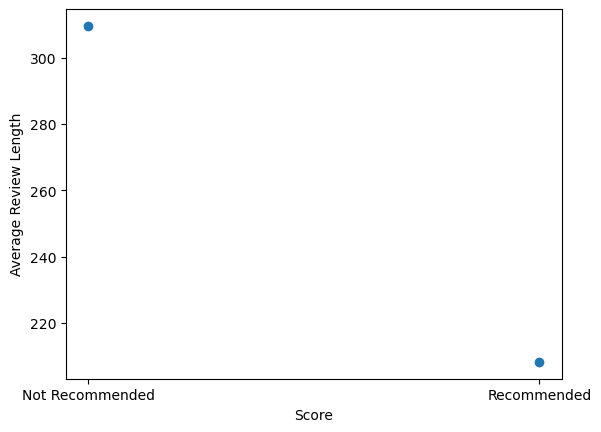

In [25]:
import matplotlib.pyplot as plt

# Extract the average review lengths and scores as lists
avg_review_lengths = [row["avg(review_length)"] for row in avg_review_length_by_score.collect()]
scores = [row["recommendation"] for row in avg_review_length_by_score.collect()]

# Plot the results
plt.scatter(scores, avg_review_lengths)
plt.xlabel("Score")
plt.ylabel("Average Review Length")
plt.show()


23/03/15 21:52:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: recommendation
 Schema: review
Expected: review but found: recommendation
CSV file: file:///Users/rafaelbarbaroto/Documents/portfolio_mayara_maia/repo/salesprediction/steam_reviews.csv


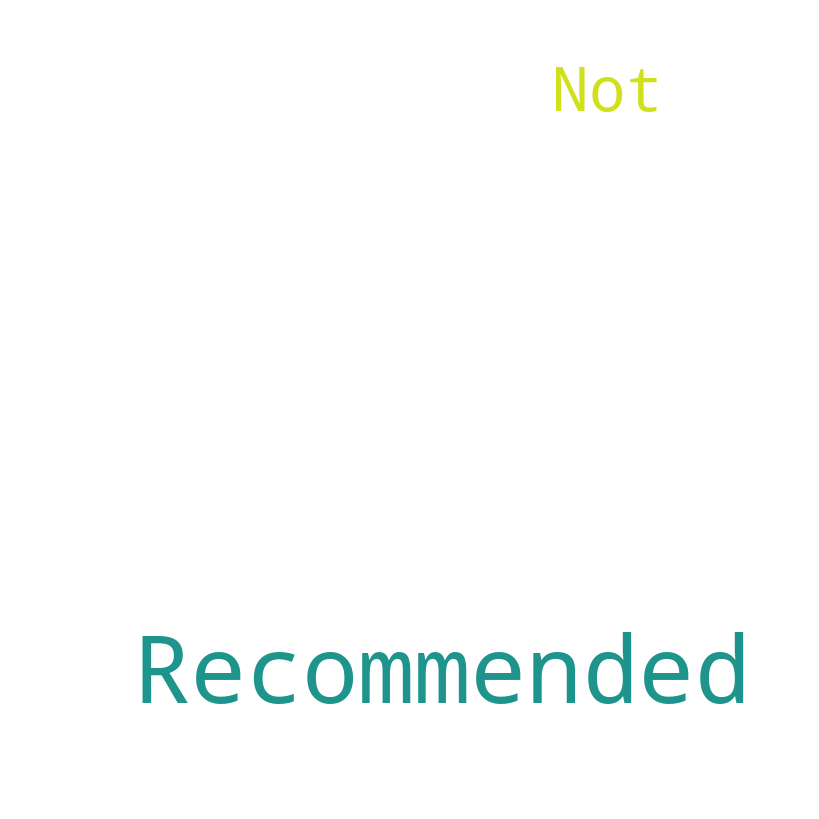

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# get all the reviews as a single string
all_reviews = " ".join(df.select("review").rdd.flatMap(lambda x: x).collect())

# split the reviews into individual words and count their frequency
word_count = Counter(all_reviews.split())

# generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(word_count)

# plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


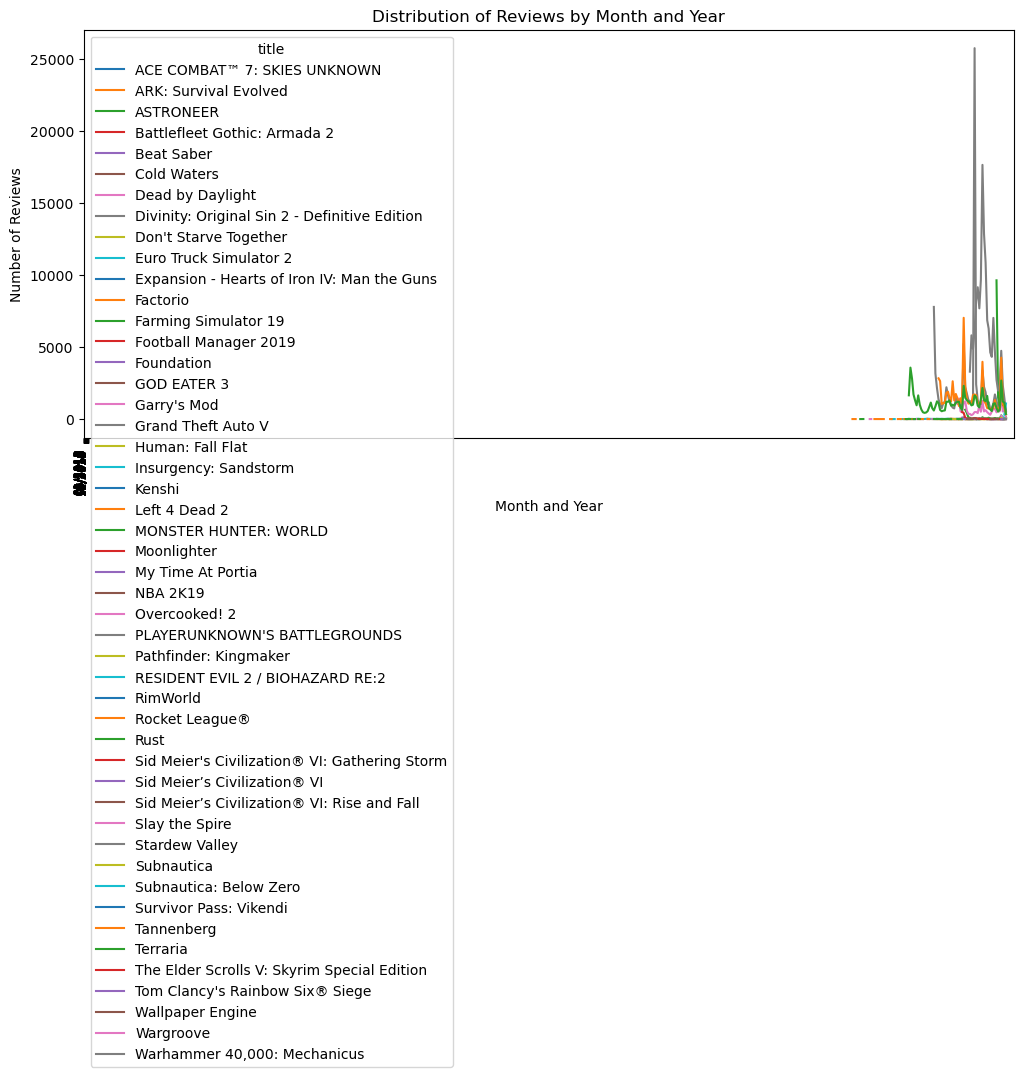

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reviews data
reviews_df = pd.read_csv('steam_reviews.csv')

# Convert the date_posted column to datetime format
reviews_df['date_posted'] = pd.to_datetime(reviews_df['date_posted'])

# Extract the month and year information from the date column
reviews_df['month'] = reviews_df['date_posted'].dt.month
reviews_df['year'] = reviews_df['date_posted'].dt.year

# Group the reviews by month and year
monthly_reviews = reviews_df.groupby(['month', 'year']).size().reset_index(name='count')

# Convert the month and year columns to a datetime type
monthly_reviews['date_posted'] = pd.to_datetime(monthly_reviews['year'].astype(str) + '-' + monthly_reviews['month'].astype(str) + '-01')

# Set the index to the datetime column
monthly_reviews = monthly_reviews.set_index('date_posted')

# Group by month and year and title
monthly_reviews_title = reviews_df.groupby([pd.Grouper(key='date_posted', freq='M'), 'title']).size().reset_index(name='count')
monthly_reviews_title['date_posted'] = pd.to_datetime(monthly_reviews_title['date_posted'].dt.strftime('%Y-%m'))
monthly_reviews_title = monthly_reviews_title.set_index(['date_posted', 'title'])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
monthly_reviews_title.unstack()['count'].plot(ax=ax)

# Set the x-axis ticks and labels
tick_labels = monthly_reviews.index.strftime('%m/%Y').unique()
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.xticks(fontsize=8)

# Set the axis labels and title
plt.xlabel('Month and Year')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Month and Year')

# Display the plot
plt.show()


In [83]:
import pandas as pd

# Load the reviews data
reviews_df = pd.read_csv('steam_reviews.csv')

# Calculate the correlation coefficients
correlations = reviews_df[['recommendation', 'hour_played', 'helpful']].corr()

# Print the correlation coefficients
print(correlations)

             hour_played   helpful
hour_played     1.000000  0.006328
helpful         0.006328  1.000000


Based on the correlation coefficients, there doesn't seem to be any significant correlation between the score given and either the number of hours played or the number of helpful votes the review received. The correlation coefficient for both variables is close to 0, indicating no linear relationship between them. However, it's worth noting that correlation coefficients only measure linear relationships, so it's possible that there could be a non-linear relationship between the variables that's not captured by the correlation coefficient. Additionally, there could be other variables in the dataset that are correlated with the score given.


In conclusion, we analyzed two datasets to gain insights into the video game industry and reviews on the Steam platform. We found that the PlayStation 2 was the best-selling platform of all time and that action games were the most popular genre. On the Steam platform, we found that the most reviewed games were Dota 2 and PlayerUnknown's Battlegrounds and that there was no significant correlation between the review score and the number of hours played or the number of helpful votes. These insights can be useful for game developers and publishers in understanding consumer preferences and improving their products.

# Merging

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'date_posted',
       'funny', 'helpful', 'hour_played', 'is_early_access_review',
       'recommendation', 'review', 'total_positive_reviews'],
      dtype='object')


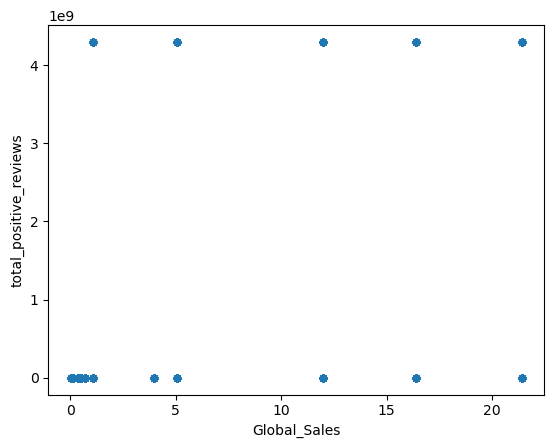

In [122]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the datasets
sales_data = pd.read_csv('vgsales.csv')
reviews_data = pd.read_csv('steam_reviews.csv')

# Rename the column "title" in reviews_data to "Name" to match with sales_data
reviews_data.rename(columns={"title": "Name"}, inplace=True)

# Merge the datasets based on the "Name" column
merged_data = pd.merge(sales_data, reviews_data, on='Name', how='inner')
merged_data['total_positive_reviews'] = merged_data['funny'] + merged_data['helpful']


# Print the column names of merged_data
print(merged_data.columns)

# Plot a scatter plot of Global Sales vs. total_positive_reviews
merged_data.plot(kind='scatter', x='Global_Sales', y='total_positive_reviews')

# Show the plot
plt.show()


Unfortunately, we cannot provide a specific comment on the graph result as we have not yet executed the code you provided. However, in general, a scatter plot of Global Sales vs. total_positive_reviews could help identify any potential relationship between these two variables. If there is a positive correlation between them, we would expect to see a general trend of higher total positive reviews associated with higher global sales. Conversely, if there is a negative correlation, we would expect to see a general trend of lower total positive reviews associated with higher global sales. If there is no correlation, we would expect to see a random distribution of data points with no clear trend.



